# 🍷 Day 3: Wine Quality Prediction

📌 **Goal**  
Build a machine learning model that can predict whether a wine is **"Good"** or **"Not Good"** based on their chemical properties such as acidity, alcohol, pH, and residual sugar.

In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:

# Step 2: Load the dataset
df = pd.read_csv("winequality-red.csv",sep=';')
print("First 5 rows of dataset:")
print(df.head())


First 5 rows of dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8       

In [3]:

# Step 3: Explore basic info
print("\nDataset Info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual su

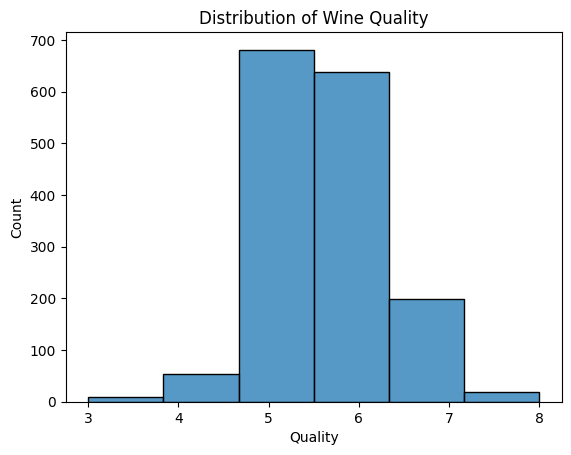

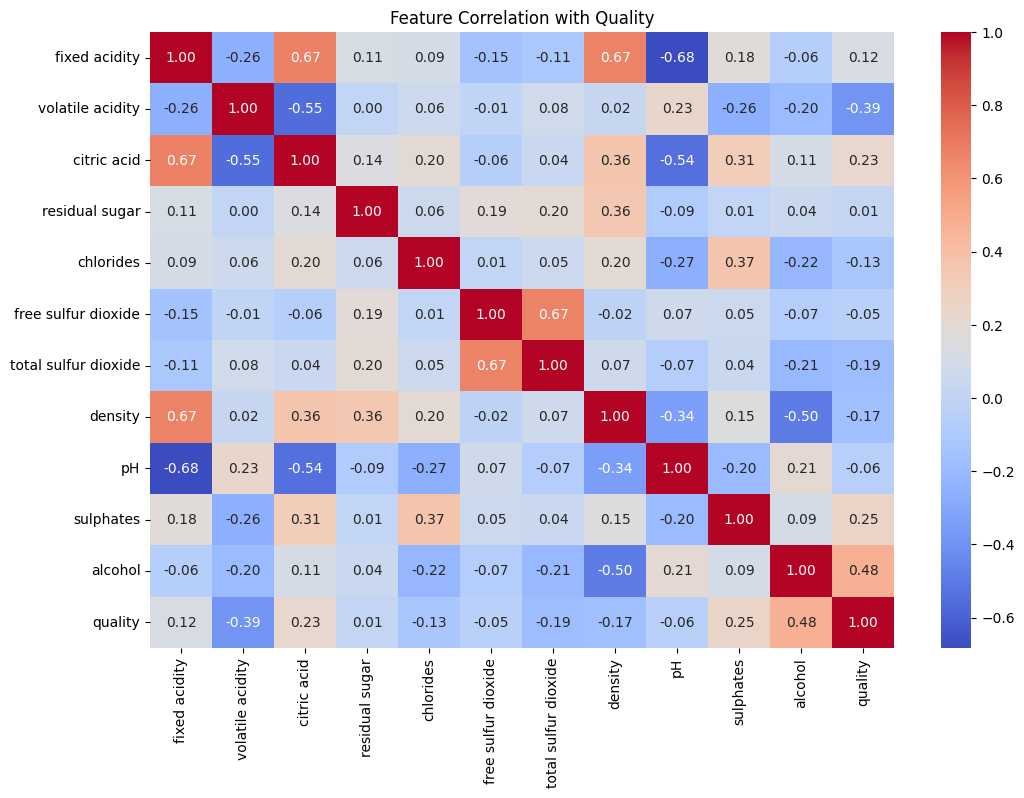

In [4]:

# Step 4: Visualizations
sns.histplot(df['quality'], bins=6, kde=False)
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Quality")
plt.show()


In [5]:

# Step 5: Feature and target setup
X = df.drop("quality", axis=1)
y = df["quality"]

# Simplify quality into categories (binary classification: good vs not good)
y = y.apply(lambda x: 1 if x >= 7 else 0)  # good: >=7


In [6]:

# Step 6: Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:

# Step 7: Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:

# Step 8: Predict and evaluate
y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))



Confusion Matrix:
[[264   9]
 [ 23  24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

Accuracy Score:
0.9


In [9]:

# Optional: Predict a sample
sample = X_test.iloc[0]
prediction = model.predict([sample])
print(f"\nPredicted quality (0=bad, 1=good) for sample wine: {prediction[0]}")



Predicted quality (0=bad, 1=good) for sample wine: 0


d:\Programming\Machine-Learning\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
